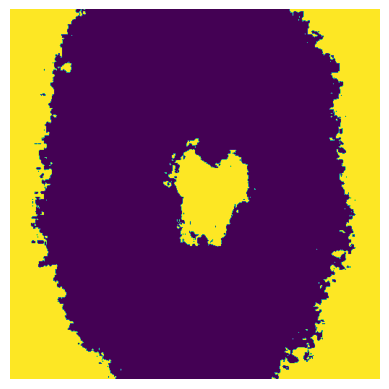

In [6]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


img = cv2.imread('sample3.jpg')


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img_flat = img.reshape((-1, 3))


kmeans = KMeans(n_clusters=2)
kmeans.fit(img_flat)
clusters = kmeans.labels_


clustered_img = np.reshape(clusters, (img.shape[0], img.shape[1]))


plt.imshow(clustered_img, cmap='viridis')
plt.axis('off')
plt.show()

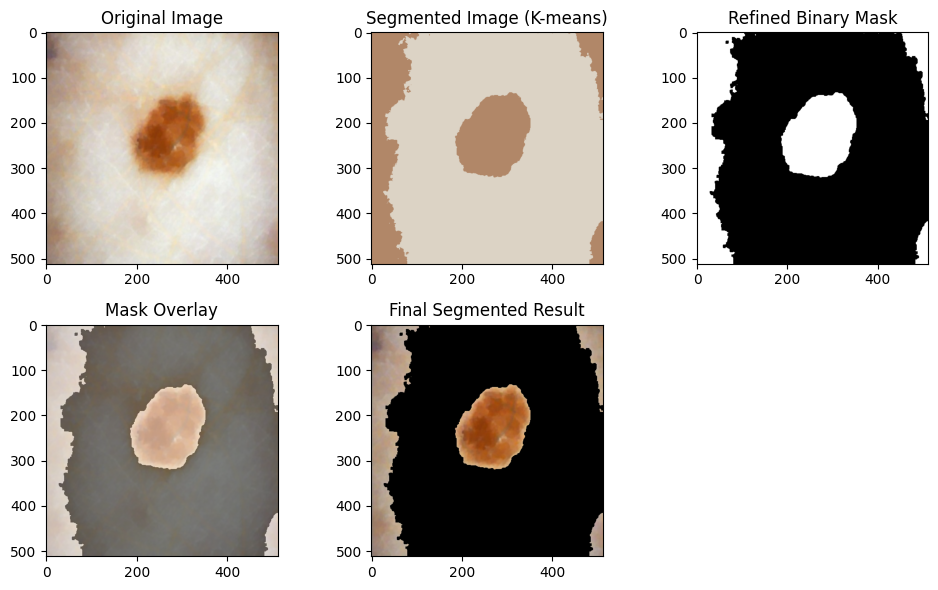

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('final_cleaned.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2  
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


centers = np.uint8(centers)
labels = labels.flatten()


segmented_image = centers[labels]
segmented_image = segmented_image.reshape(image_rgb.shape)


mask = labels.reshape(image_rgb.shape[:2])
target_cluster = 1 
binary_mask = (mask == target_cluster).astype(np.uint8) * 255


kernel = np.ones((5, 5), np.uint8)
refined_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)


segmented_result = cv2.bitwise_and(image_rgb, image_rgb, mask=refined_mask)


plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(232)
plt.imshow(segmented_image)
plt.title('Segmented Image (K-means)')

plt.subplot(233)
plt.imshow(refined_mask, cmap='gray')
plt.title('Refined Binary Mask')

plt.subplot(234)
plt.imshow(image_rgb)
plt.imshow(refined_mask, cmap='gray', alpha=0.5)
plt.title('Mask Overlay')

plt.subplot(235)
plt.imshow(segmented_result)
plt.title('Final Segmented Result')

plt.tight_layout()
plt.show()
